In [1]:
#!pip install --upgrade tensorflow
#!pip install --upgrade keras
from tensorflow.keras.models import load_model
from google.colab import drive
import pandas as pd
import json

# This will prompt for authorization.
drive.mount('/content/drive')

# Path to the saved model
model_load_path = '/content/drive/My Drive/models/MainlstmJiggler.h5'

# Load the model
loaded_model = load_model(model_load_path)
loaded_model.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_68 (LSTM)                       │ (None, 100)                 │          58,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_34 (RepeatVector)      │ (None, 5, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_69 (LSTM)                       │ (None, 5, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_34                  │ (None, 5, 37)               │           3,737 │
│ (TimeDistributed)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 142,939 (558.36 KB)

 Trainable params: 142,937 (558.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [2]:
# Path to your dataset on Google Drive
file_path = '/content/drive/My Drive/datasetsFYP/BarcelonaRepl.csv'

states = pd.read_csv(file_path)
#with open('/content/drive/My Drive/datasetsFYP/Test01_LongSine.json', 'r') as file:
#    json_data = json.load(file)
states

Unnamed: 0  xWorld_1  vWorld_1  gWorld_1  xChassis_1  vChassis_1  \
0                0 -0.003972 -0.010874  0.075164   -0.003547   -0.012984   
1                1 -0.003974 -0.010484 -0.196422   -0.003551   -0.012581   
2                2 -0.003975 -0.010075  0.091625   -0.003552   -0.012166   
3                3 -0.003976 -0.010021  0.653769   -0.003554   -0.012113   
4                4 -0.003979 -0.009477  1.176278   -0.003558   -0.011561   
...            ...       ...       ...       ...         ...         ...   
146895      146895  0.000322 -0.007065 -0.583153    0.000322   -0.007067   
146896      146896  0.000316 -0.007777 -0.827759    0.000316   -0.007779   
146897      146897  0.000309 -0.007920 -1.032022    0.000309   -0.007922   
146898      146898  0.000303 -0.008386 -1.023549    0.000303   -0.008389   
146899      146899  0.000299 -0.008631 -0.820732    0.000299   -0.008634   

        gChassis_1  xWorld_2  vWorld_2  gWorld_2  ...     time  Force_HFP_1  \
0         0.073569 -0.013989  0.028597  0.055146  ...   0.0000    -0.457440   
1        -0.191560 -0.013975  0.028396 -0.144633  ...   0.0005    -0.411696   
2         0.087464 -0.013960  0.028321  0.144319  ...   0.0010    -0.365952   
3         0.635806 -0.013946  0.028309  0.584372  ...   0.0015    -0.274464   
4         1.164307 -0.013930  0.028393  0.380690  ...   0.0020    -0.137232   
...            ...       ...       ...       ...  ...      ...          ...   
146895   -0.582973 -0.000138 -0.000050 -0.375926  ...  73.4475     1.166472   
146896   -0.827586 -0.000138  0.000110 -0.510862  ...  73.4480     1.143600   
146897   -1.031957 -0.000139  0.000029 -0.333740  ...  73.4485     0.892008   
146898   -1.023567 -0.000139  0.000476  0.018733  ...  73.4490     0.526056   
146899   -0.820699 -0.000139  0.000047  0.177180  ...  73.4495     0.091488   

        Force_HFP_2  Force_HFP_3  Force_HFP_4  Force_HFP_5  Force_HFP_6  \
0          1.418064    -7.113192     3.179208     0.617544    -3.179208   
1          1.349448    -7.113192     3.247824     0.457440    -3.270696   
2          1.212216    -7.181808     3.247824     0.343080    -3.430800   
3          1.280832    -7.250424     3.316440     0.160104    -3.796752   
4          1.349448    -7.296168     3.362184    -0.022872    -4.071216   
...             ...          ...          ...          ...          ...   
146895     1.418064    -3.842496     3.179208     1.715400    -3.590904   
146896     1.326576    -3.773880     3.156336     1.784016    -3.590904   
146897     1.074984    -3.659520     3.133464     2.012736    -3.293568   
146898     0.686160    -3.522288     3.110592     2.332944    -2.813256   
146899     0.343080    -3.385056     3.041976     2.721768    -2.378688   

        Force_LFP_1  Force_LFP_2  Force_LFP_3  
0         -3.430800     0.068616     0.022872  
1         -3.156336     0.160104     0.045744  
2         -2.973360     0.091488     0.114360  
3         -2.790384     0.114360     0.182976  
4         -2.698896     0.182976     0.228720  
...             ...          ...          ...  
146895     0.114360    -0.022872    -0.068616  
146896     0.137232    -0.091488    -0.022872  
146897     0.114360    -0.160104     0.022872  
146898     0.114360    -0.205848     0.068616  
146899     0.114360    -0.228720     0.091488  

[146900 rows x 47 columns]

In [3]:
states_xWorld = states.drop('Unnamed: 0',axis=1)
#states_xWorld = states_xWorld.drop('time',axis=1)
states_xWorld

xWorld_1  vWorld_1  gWorld_1  xChassis_1  vChassis_1  gChassis_1  \
0      -0.003972 -0.010874  0.075164   -0.003547   -0.012984    0.073569   
1      -0.003974 -0.010484 -0.196422   -0.003551   -0.012581   -0.191560   
2      -0.003975 -0.010075  0.091625   -0.003552   -0.012166    0.087464   
3      -0.003976 -0.010021  0.653769   -0.003554   -0.012113    0.635806   
4      -0.003979 -0.009477  1.176278   -0.003558   -0.011561    1.164307   
...          ...       ...       ...         ...         ...         ...   
146895  0.000322 -0.007065 -0.583153    0.000322   -0.007067   -0.582973   
146896  0.000316 -0.007777 -0.827759    0.000316   -0.007779   -0.827586   
146897  0.000309 -0.007920 -1.032022    0.000309   -0.007922   -1.031957   
146898  0.000303 -0.008386 -1.023549    0.000303   -0.008389   -1.023567   
146899  0.000299 -0.008631 -0.820732    0.000299   -0.008634   -0.820699   

        xWorld_2  vWorld_2  gWorld_2  xChassis_2  ...     time  Force_HFP_1  \
0      -0.013989  0.028597  0.055146   -0.014103  ...   0.0000    -0.457440   
1      -0.013975  0.028396 -0.144633   -0.014089  ...   0.0005    -0.411696   
2      -0.013960  0.028321  0.144319   -0.014074  ...   0.0010    -0.365952   
3      -0.013946  0.028309  0.584372   -0.014059  ...   0.0015    -0.274464   
4      -0.013930  0.028393  0.380690   -0.014043  ...   0.0020    -0.137232   
...          ...       ...       ...         ...  ...      ...          ...   
146895 -0.000138 -0.000050 -0.375926   -0.000138  ...  73.4475     1.166472   
146896 -0.000138  0.000110 -0.510862   -0.000138  ...  73.4480     1.143600   
146897 -0.000139  0.000029 -0.333740   -0.000138  ...  73.4485     0.892008   
146898 -0.000139  0.000476  0.018733   -0.000139  ...  73.4490     0.526056   
146899 -0.000139  0.000047  0.177180   -0.000139  ...  73.4495     0.091488   

        Force_HFP_2  Force_HFP_3  Force_HFP_4  Force_HFP_5  Force_HFP_6  \
0          1.418064    -7.113192     3.179208     0.617544    -3.179208   
1          1.349448    -7.113192     3.247824     0.457440    -3.270696   
2          1.212216    -7.181808     3.247824     0.343080    -3.430800   
3          1.280832    -7.250424     3.316440     0.160104    -3.796752   
4          1.349448    -7.296168     3.362184    -0.022872    -4.071216   
...             ...          ...          ...          ...          ...   
146895     1.418064    -3.842496     3.179208     1.715400    -3.590904   
146896     1.326576    -3.773880     3.156336     1.784016    -3.590904   
146897     1.074984    -3.659520     3.133464     2.012736    -3.293568   
146898     0.686160    -3.522288     3.110592     2.332944    -2.813256   
146899     0.343080    -3.385056     3.041976     2.721768    -2.378688   

        Force_LFP_1  Force_LFP_2  Force_LFP_3  
0         -3.430800     0.068616     0.022872  
1         -3.156336     0.160104     0.045744  
2         -2.973360     0.091488     0.114360  
3         -2.790384     0.114360     0.182976  
4         -2.698896     0.182976     0.228720  
...             ...          ...          ...  
146895     0.114360    -0.022872    -0.068616  
146896     0.137232    -0.091488    -0.022872  
146897     0.114360    -0.160104     0.022872  
146898     0.114360    -0.205848     0.068616  
146899     0.114360    -0.228720     0.091488  

[146900 rows x 46 columns]

In [4]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# Normalize the data
states_xWorldNoForce = states_xWorld[states_xWorld.columns.drop(list(states_xWorld.filter(regex='Force')))]
scaler = MinMaxScaler(feature_range=(0, 1))
Xdata_scaled = scaler.fit_transform(states_xWorld)
Ydata_scaled = scaler.fit_transform(states_xWorldNoForce)

# Prepare data for LSTM
def create_dataset(Xdataset, Ydataset, look_back=10, forecast_horizon=5):
    X, Y = [], []
    for i in range(0,len(Xdataset) - look_back - forecast_horizon + 1,5):
        X.append(Xdataset[i:(i + look_back), :])
        Y.append(Ydataset[(i + look_back):(i + look_back + forecast_horizon), :])
    return np.array(X), np.array(Y)

# Look back period and dataset preparation
# Dataset preparation with specified look_back and forecast_horizon
look_back = 10
forecast_horizon = 5
X, Y = create_dataset(Xdata_scaled, Ydata_scaled, look_back, forecast_horizon)
# Reshape input to be [samples, time steps, features]
#X = np.reshape(X, (X.shape[0], X.shape[1], states_xWorld.shape[1]))

#print(data_scaled)
#print((X[0]))
print(X)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.4 MB/s eta 0:00:00
[[[0.61254984 0.65464042 0.53626373 ... 0.43435822 0.50124441 0.50637254]
  [0.61250973 0.6554097  0.53292487 ... 0.44021474 0.50323545 0.50686274]
  [0.61250533 0.65621424 0.5364661  ... 0.44411908 0.50174217 0.50833333]
  ...
  [0.61218169 0.65658645 0.54122244 ... 0.45534407 0.51219513 0.51862744]
  [0.61202859 0.65496492 0.5391473  ... 0.45924841 0.51169737 0.52156862]
  [0.61185722 0.65386255 0.53164668 ... 0.46412885 0.50970633 0.5245098 ]]

 [[0.61238237 0.65762501 0.54770108 ... 0.4499756  0.50821305 0.51323529]
  [0.61230143 0.6574186  0.54442102 ... 0.45241581 0.51119961 0.51617646]
  [0.61218169 0.65658645 0.54122244 ... 0.45534407 0.51219513 0.51862744]
  ...
  [0.61132294 0.64912427 0.51988852 ... 0.4704734  0.51368841 0.53284313]
  [0.61121621 0.6489484  0.52064293 ... 0.4704734  0.51717273 0.53529411]
  [0.6111285

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, RepeatVector
import tensorflow as tf

model = loaded_model
for layer in model.layers[-20:]:  # Adjust the number based on how many layers you want to unfreeze
    layer.trainable = True
# Prepare new dataset for the target task
X_train = X[:int(0.75*(len(X)))]
X_test = X[int(0.75*(len(X))):]
Y_train = Y[:int(0.75*(len(Y)))]
Y_test = Y[int(0.75*(len(Y))):]
# Compile model with a small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mse')

# Train the model on the new data
model.fit(X_train, Y_train, epochs=10, batch_size=32,verbose=1)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0011
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 5.7375e-04
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 5.3976e-04
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.9725e-04
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.8665e-04
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 4.6410e-04
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.5892e-04
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.6844e-04
Epoch 9/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.6710e-04
Epoch 10/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 4.5181e-04


In [6]:
#predictions = loaded_model.predict(X_test)
predictions = model.predict(X_test)
predictions

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[[0.6751839 , 0.65034235, 0.5431941 , ..., 0.38642958,
         0.4272887 , 0.70522714],
        [0.67700964, 0.65230757, 0.54470307, ..., 0.38776037,
         0.42963636, 0.71133167],
        [0.6773577 , 0.65263224, 0.5444438 , ..., 0.3897501 ,
         0.43044013, 0.7106992 ],
        [0.67726994, 0.6528029 , 0.5447804 , ..., 0.390128  ,
         0.43026105, 0.71014994],
        [0.67714727, 0.65322584, 0.54499435, ..., 0.39043373,
         0.429938  , 0.70986366]],

       [[0.67501676, 0.6524639 , 0.541436  , ..., 0.38553816,
         0.43041432, 0.70377606],
        [0.6766142 , 0.65392566, 0.54139656, ..., 0.38689074,
         0.43128273, 0.7096044 ],
        [0.67710125, 0.65377325, 0.5408357 , ..., 0.38882378,
         0.43159238, 0.70901996],
        [0.67714256, 0.65369767, 0.5410933 , ..., 0.38906077,
         0.43131718, 0.7084811 ],
        [0.67711556, 0.6539236 , 0.5412457 , ..., 0.38925177,
         0.4310121 , 0.7081975 ]],

       [[0.67449975, 0.6496291 , 0.5

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Y_test.reshape(-1, Y.shape[2]), predictions.reshape(-1, Y.shape[2]))
#mse2 = mean_squared_error(Y_test.reshape(-1, Y.shape[2]), predictions2.reshape(-1, Y.shape[2]))
print(mse)
#print(mse2)

0.000749028650223012


In [8]:
next_step_tf = predictions
for i in range(len(predictions)):
  next_step_tf[i]=scaler.inverse_transform(predictions[i])
print(len(next_step_tf))
next_step_tf[:3]

7345


array([[[-1.48029052e-04, -1.30565166e-02,  6.38890207e-01,
         -1.41545315e-04, -1.30387275e-02,  6.14357829e-01,
          5.00491587e-04,  1.71001418e-03,  1.48265779e-01,
          4.88926074e-04,  1.69952912e-03,  1.46811128e-01,
          2.88275303e-04,  7.61373609e-04, -2.52952784e-01,
          2.89395626e-04,  8.64930160e-04, -2.56695539e-01,
          1.58116982e-05,  3.88482615e-04, -4.68460619e-01,
          1.61142871e-05,  3.30639596e-04, -4.68702346e-01,
         -1.30125263e-04, -7.93911517e-03,  4.01412666e-01,
         -1.29904205e-04, -7.92320073e-03,  4.22695786e-01,
          9.04571917e-03, -1.69422547e-03, -7.88720071e-01,
          9.04541276e-03, -2.03545322e-03, -7.68429399e-01,
          5.17985802e+01],
        [-3.65622873e-05, -1.20587982e-02,  7.61630058e-01,
         -2.82315614e-05, -1.20535661e-02,  7.45906115e-01,
          4.36781731e-04,  1.96793582e-03,  3.56280990e-02,
          4.33231296e-04,  1.94303866e-03,  2.89014410e-02,
          2.7

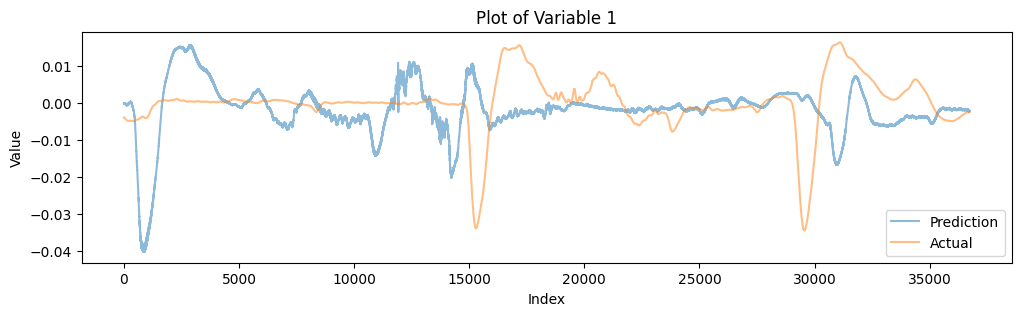

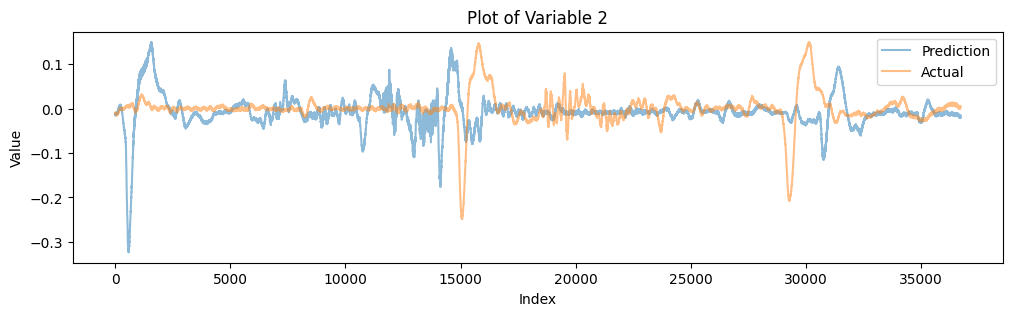

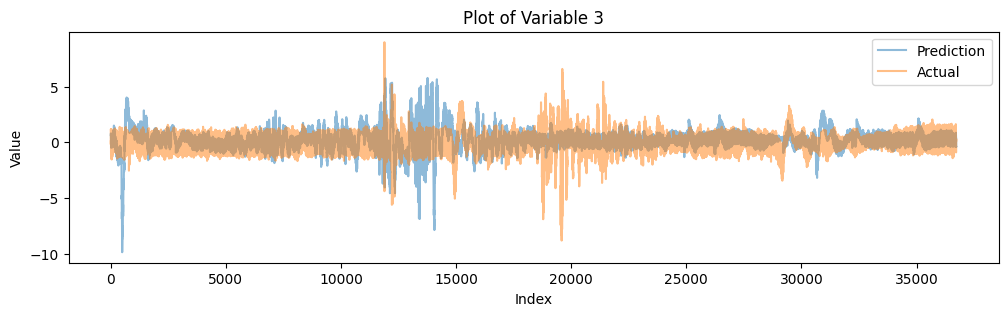

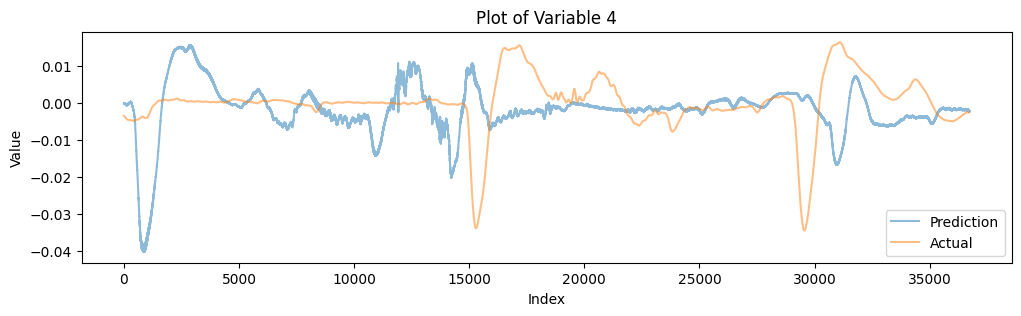

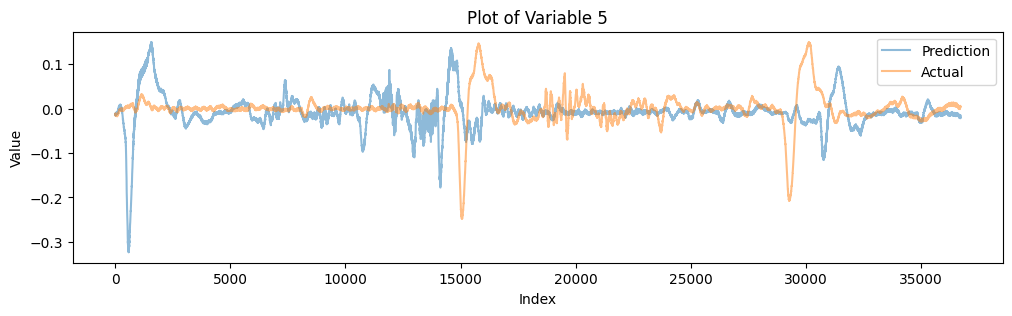

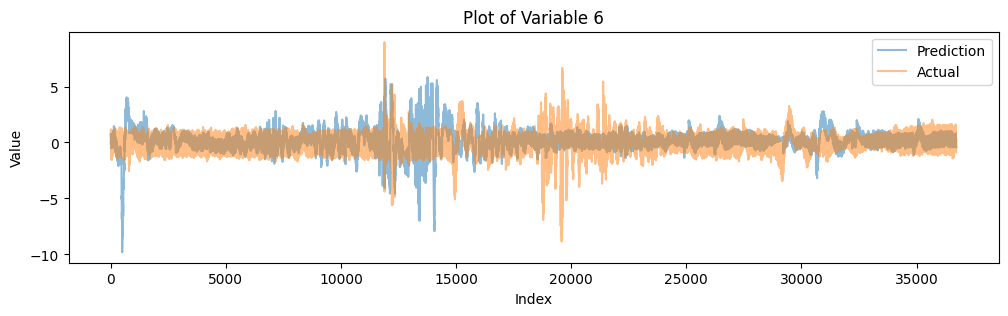

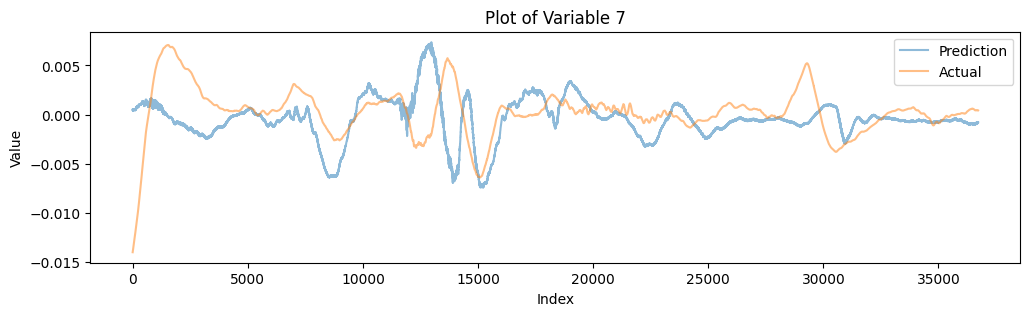

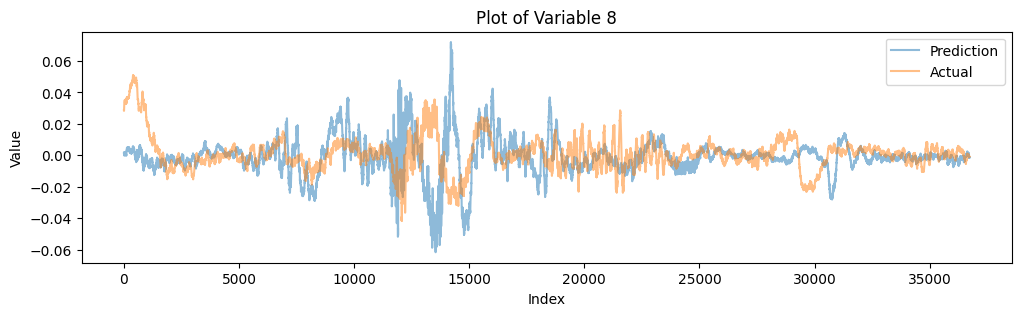

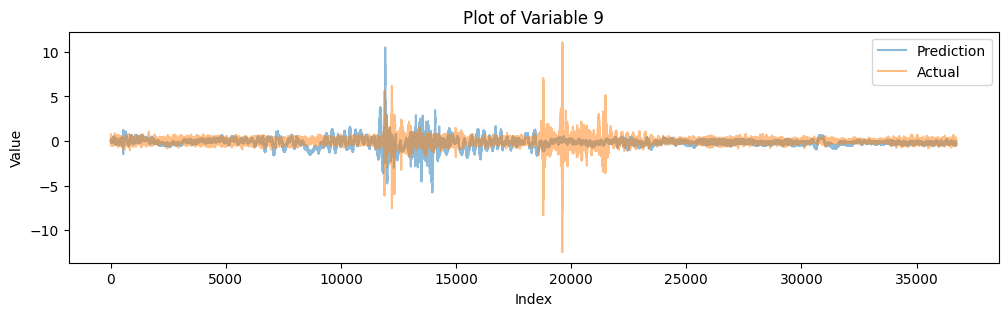

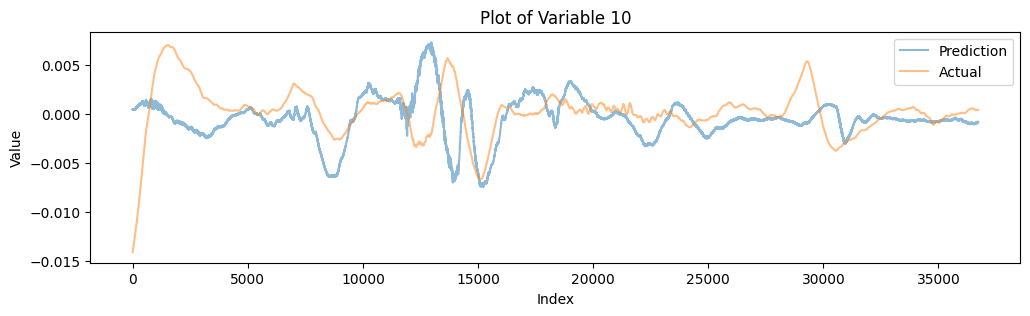

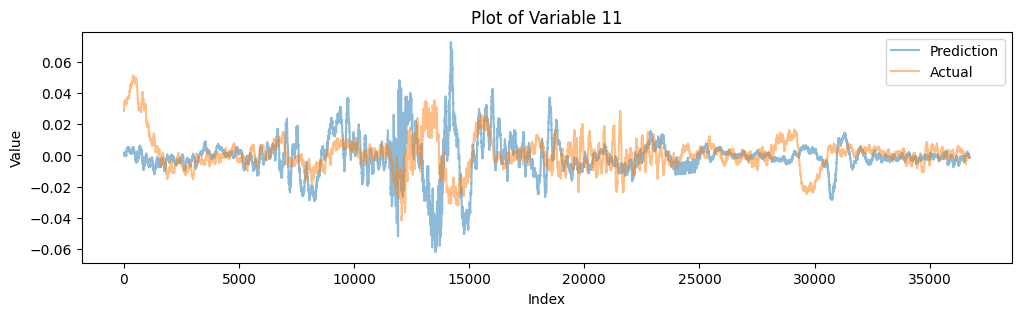

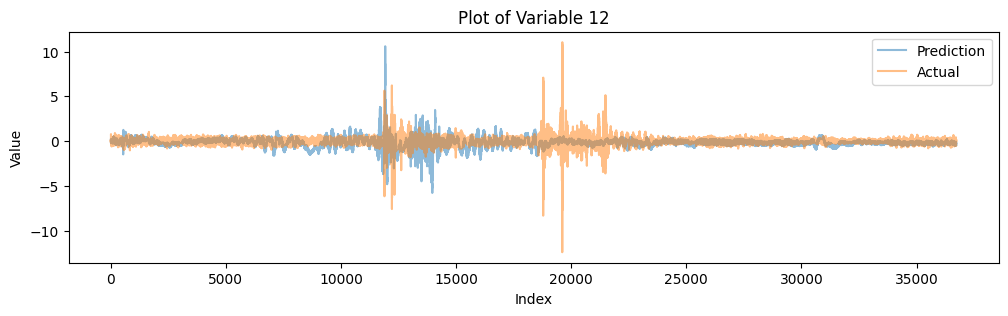

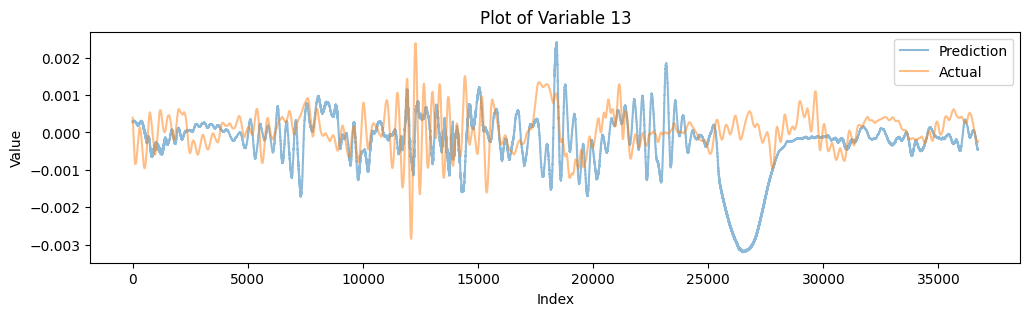

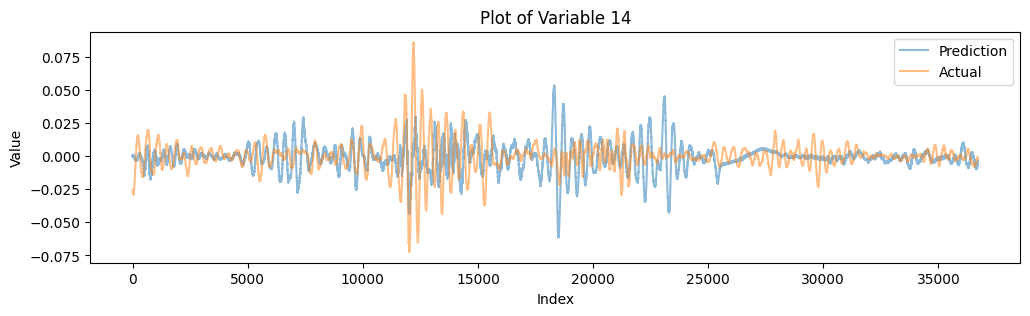

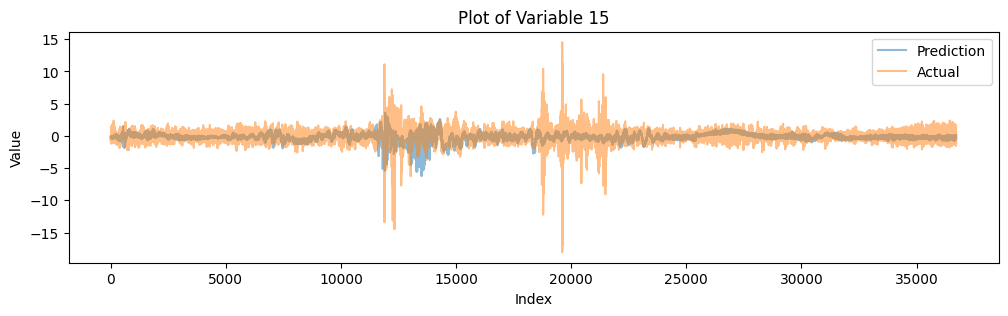

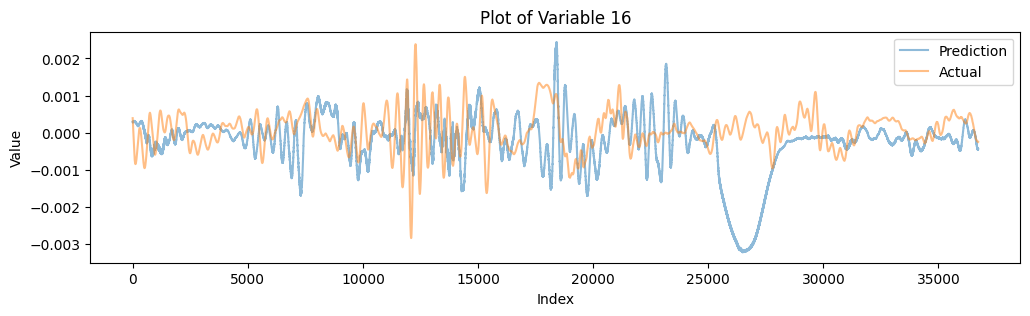

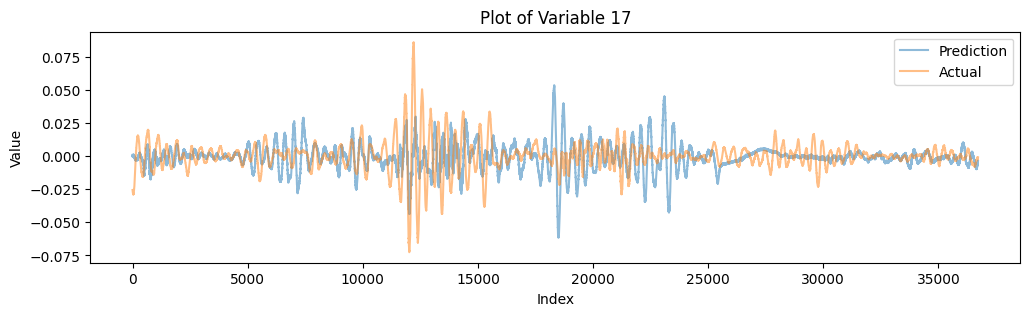

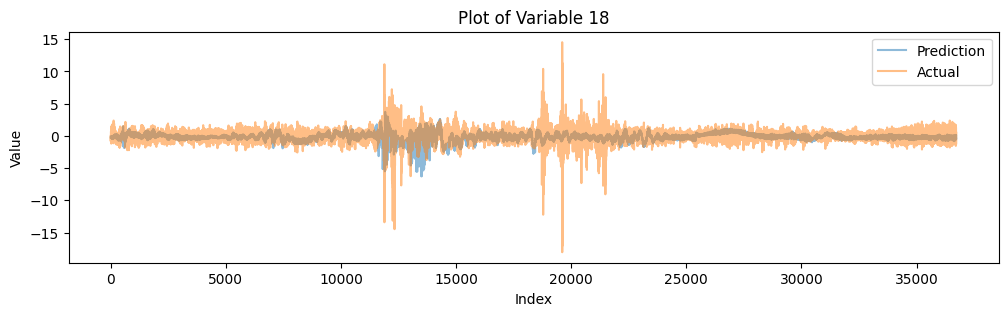

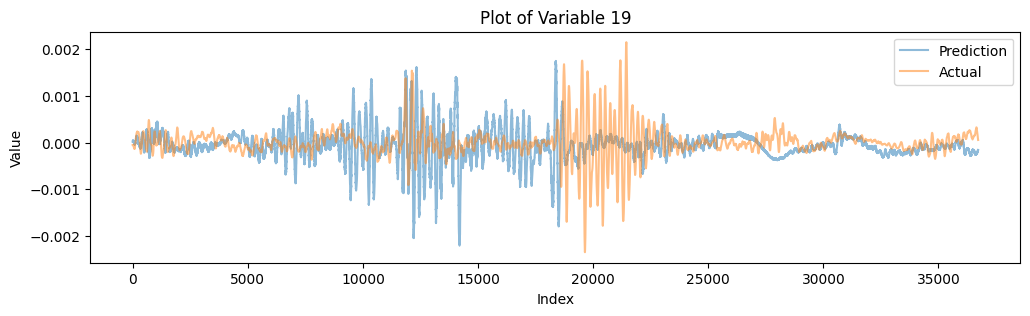

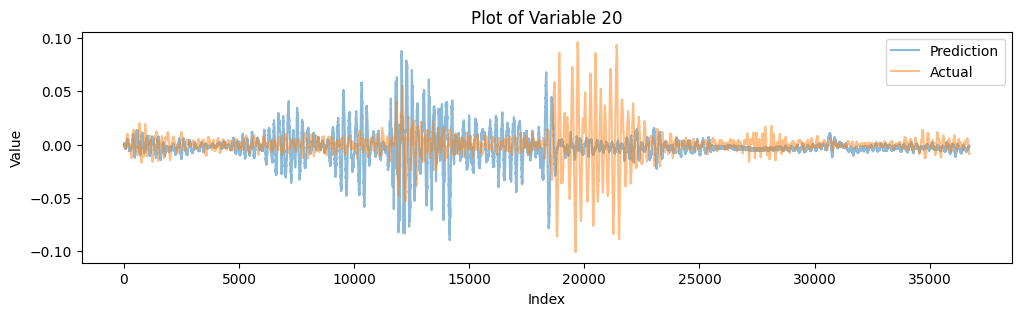

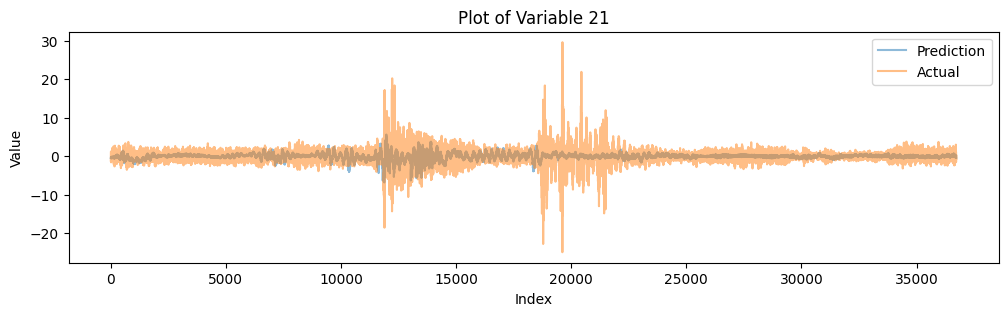

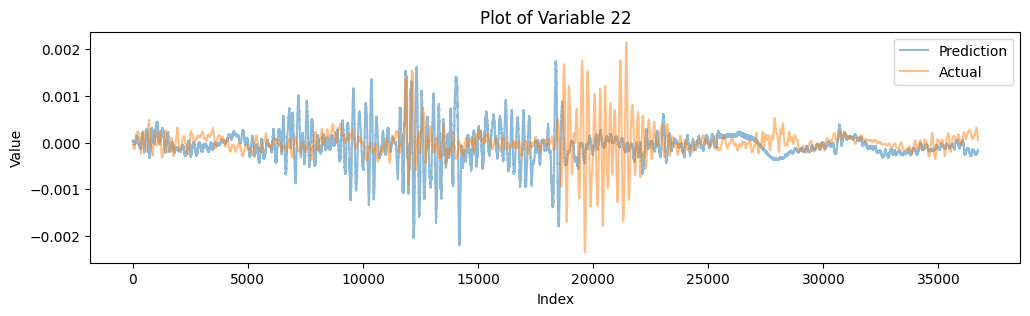

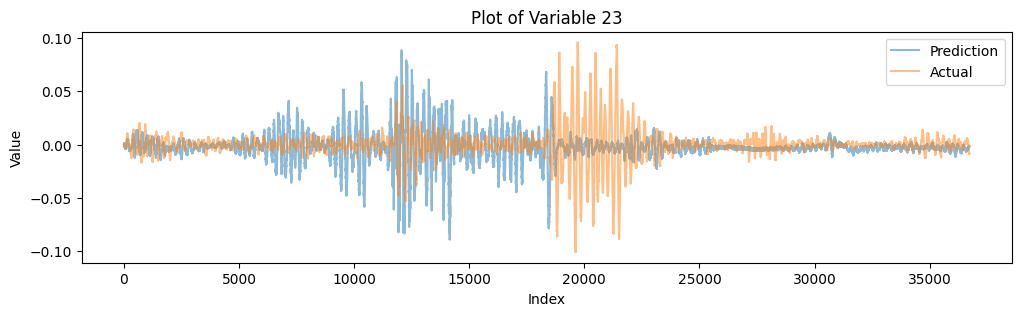

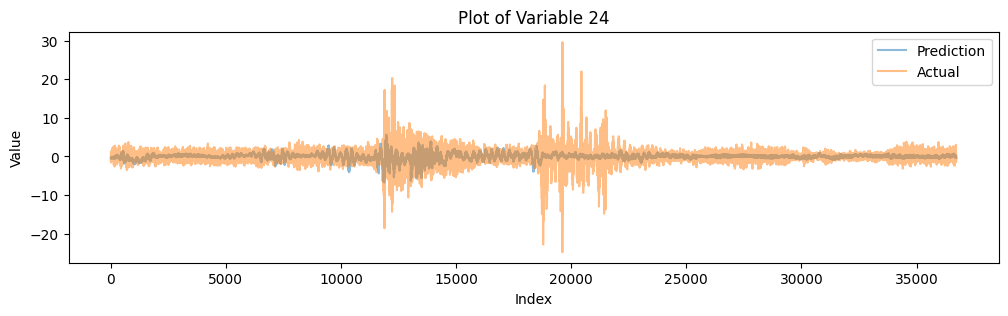

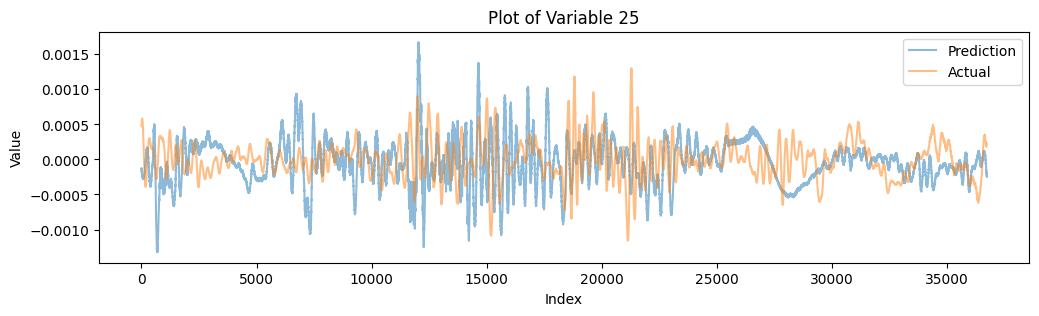

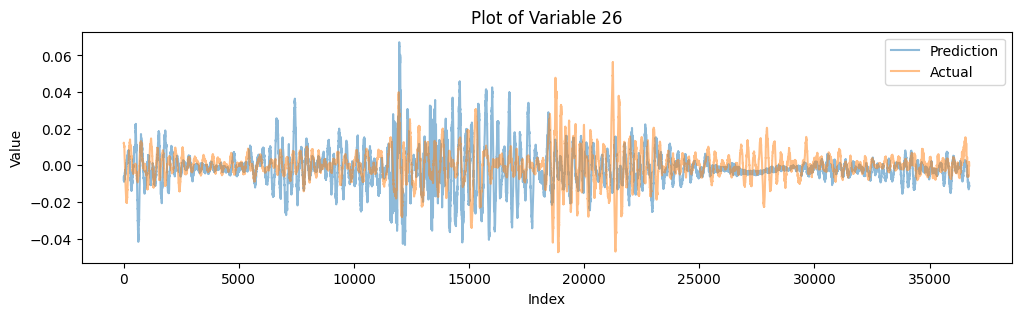

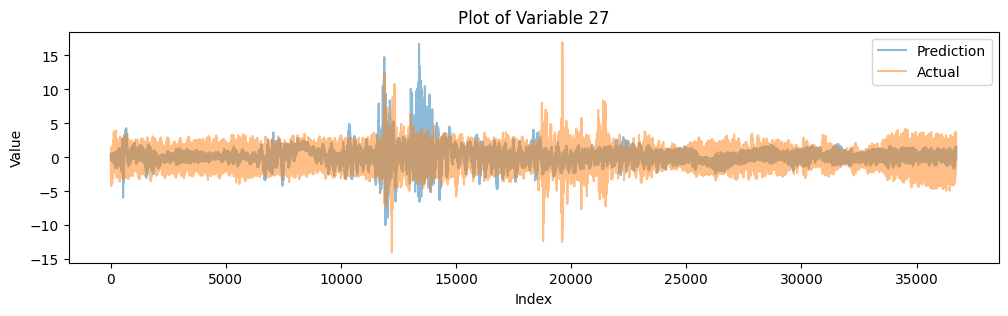

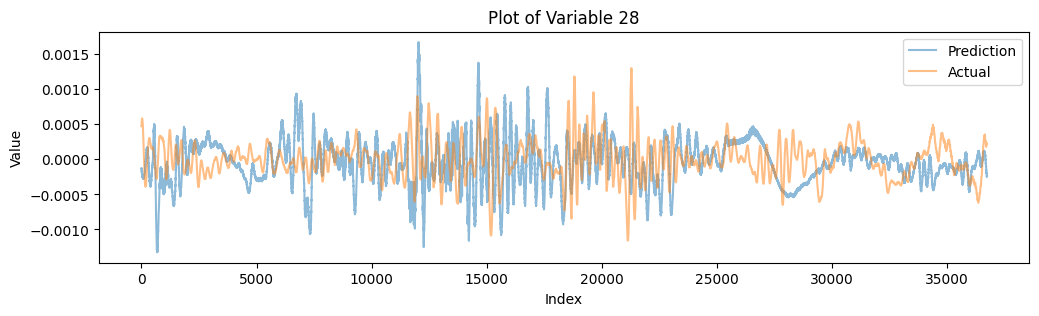

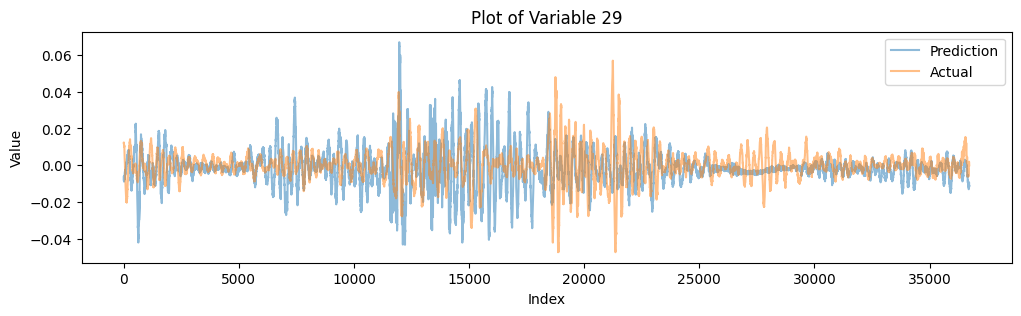

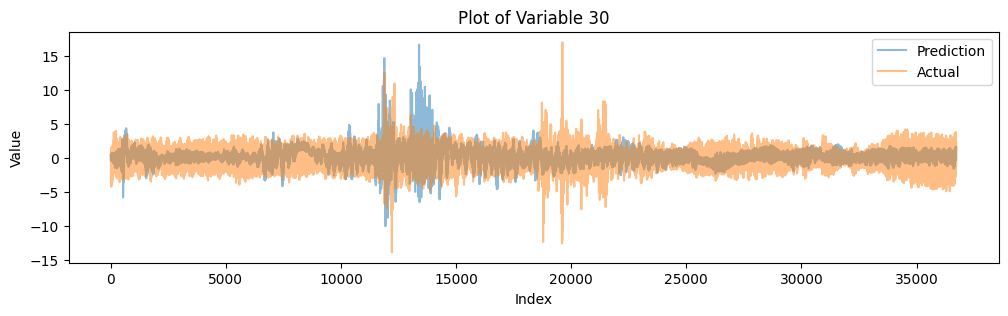

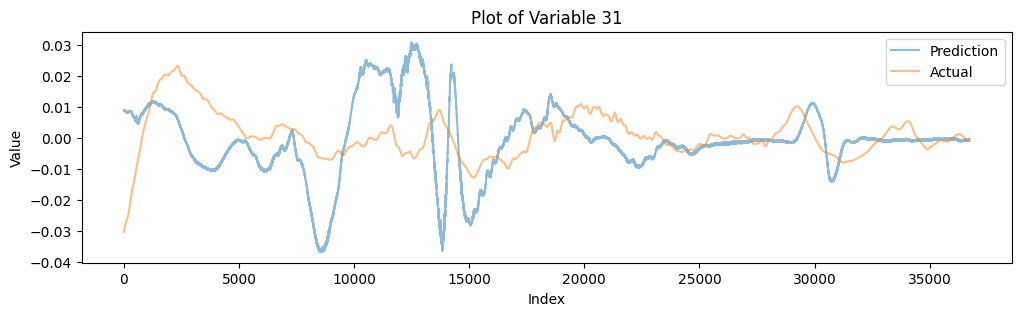

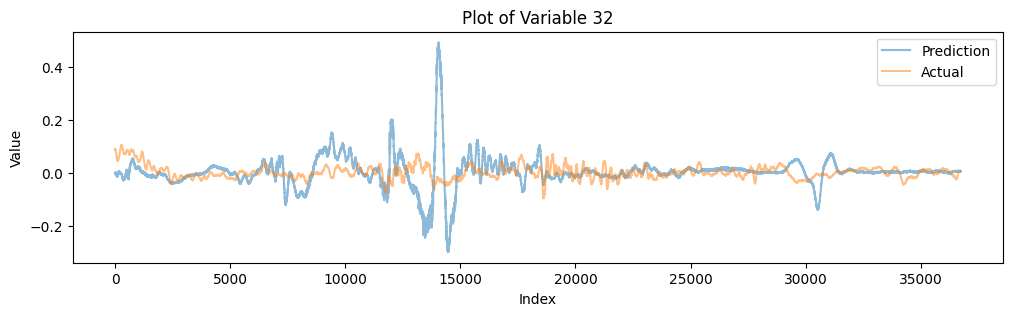

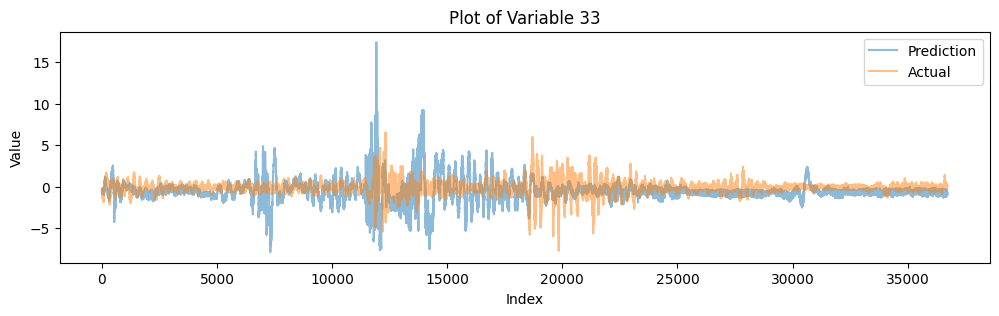

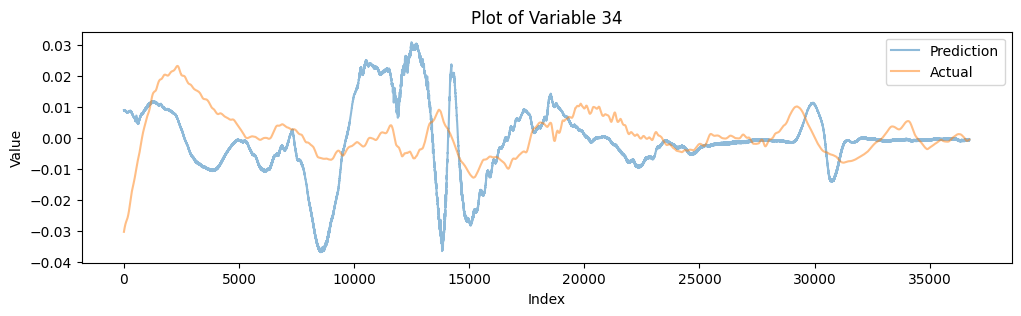

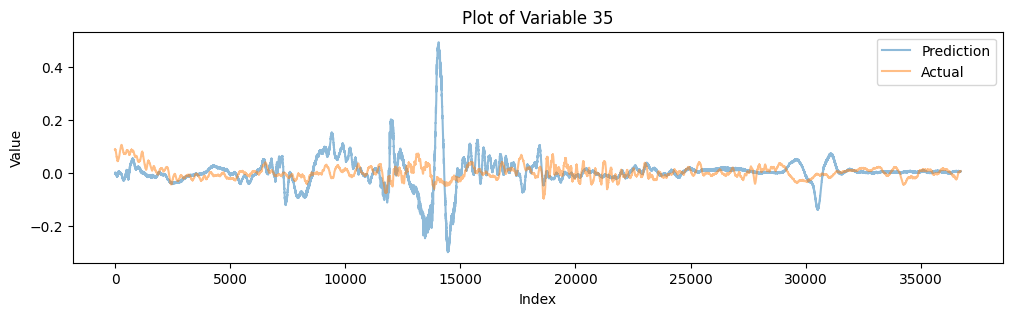

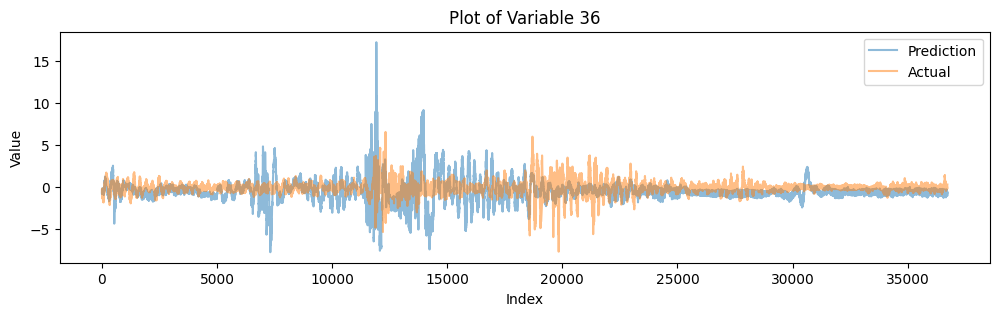

In [9]:
import matplotlib.pyplot as plt

# Assuming 'next_step' contains your predicted values and 'states' contains your actual values
number_of_variables = 36  # Adjust this based on your actual number of variables
for x in range(number_of_variables):
    #print(next_step)
    variables_x = []
    for i in next_step_tf:
        for j in i:
            variables_x.append(j[x])

    # Plot the extracted variables
    plt.figure(figsize=(12, 3))
    first_variables = states_xWorld.iloc[:, x]
    plt.plot(variables_x, label='Prediction',alpha=0.5)
    plt.plot(first_variables[:int(0.25*len(first_variables))], label='Actual',alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Plot of Variable {x + 1}')
    plt.legend()
    plt.show()


In [10]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU")
import time
sizes = [1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7500,8000,8500,9000,9500,10000,12000,14000,16000,18000,20000,22000,25000,27000,29378]
time_taken = []
time_taken_len = []
#get the timestamp before inference in seconds
for size in sizes:
  xt = X[:size]
  print(len(xt))
  #print(xt)
  start_ts = time.time()
  #Predict the response for test dataset. I want to measure the speed of this prediction here.
  predictions = loaded_model.predict(xt)
  #get the timestamp after the inference in second
  end_ts = time.time()
  time_taken.append(end_ts - start_ts)
  time_taken_len.append((end_ts - start_ts)/size)

print(time_taken)
print(time_taken_len)

GPU not available, using CPU
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1500
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
2500
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3000
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
3500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
4000
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
4500
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
5000
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
5500
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
6000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
6500
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
8000
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
8500
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
9000
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
9500
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
14000
438/438 ━━━━━━━━

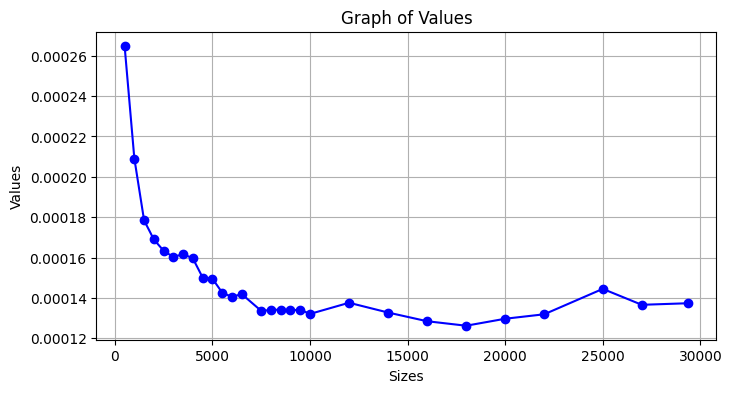

In [11]:
plt.figure(figsize=(8, 4))  # Setting the figure size
plt.plot(sizes[1:],time_taken_len[1:], marker='o', linestyle='-', color='b')  # Plotting the data
plt.title('Graph of Values')  # Title of the graph
plt.xlabel('Sizes')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.grid(True)  # Enabling the grid
plt.show()  # Displaying the plot

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import drive
import pandas as pd
import json

# This will prompt for authorization.
drive.mount('/content/drive')

# Path to the saved model
model_load_path = '/content/drive/My Drive/lstmJiggler.h5'

# Load the model
loaded_model = load_model(model_load_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Unrecognized keyword arguments passed to LSTM: {'time_major': False}

In [ ]:
# Path to your dataset on Google Drive
file_path = '/content/drive/My Drive/datasetsFYP/BarcelonaRepl.csv'

states = pd.read_csv(file_path)
#with open('/content/drive/My Drive/datasetsFYP/Test01_LongSine.json', 'r') as file:
#    json_data = json.load(file)
#states

In [ ]:
states_xWorld = states.drop('Unnamed: 0',axis=1)
states_xWorld = states_xWorld.drop('time',axis=1)

#states_xWorld = states_xWorld.drop('time',axis=1)
#states_xWorld

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
states_xWorldNoForce = states_xWorld[states_xWorld.columns.drop(list(states_xWorld.filter(regex='Force')))]
scaler = MinMaxScaler(feature_range=(0, 1))
Xdata_scaled = scaler.fit_transform(states_xWorld)
Ydata_scaled = scaler.fit_transform(states_xWorldNoForce)

# Prepare data for LSTM
def create_dataset(Xdataset, Ydataset, look_back=10, forecast_horizon=5):
    X, Y = [], []
    for i in range(0,len(Xdataset) - look_back - forecast_horizon + 1,5):
        a = Xdataset[i:(i + look_back), :]
        X.append(a)
        y = Ydataset[(i + look_back):(i + look_back + forecast_horizon), :]
        Y.append(y)
    return np.array(X), np.array(Y)

# Look back period and dataset preparation
# Dataset preparation with specified look_back and forecast_horizon
look_back = 10
forecast_horizon = 5
X, Y = create_dataset(Xdata_scaled, Ydata_scaled, look_back, forecast_horizon)
# Reshape input to be [samples, time steps, features]
#X = np.reshape(X, (X.shape[0], X.shape[1], states_xWorld.shape[1]))

#print(data_scaled)
#print((X[0]))
#print(X)

In [ ]:
predictions = model.predict(X)
mse = mean_squared_error(Y.reshape(-1, Y.shape[2]), predictions.reshape(-1, predictions.shape[2]))


919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [ ]:
print(mse)

0.0005159187824848102


In [ ]:
next_step_tf = predictions
for i in range(len(predictions)):
  next_step_tf[i]=scaler.inverse_transform(predictions[i])
#print(len(next_step_tf))
#next_step_tf[:3]

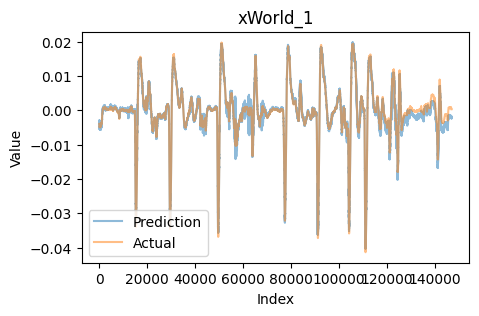

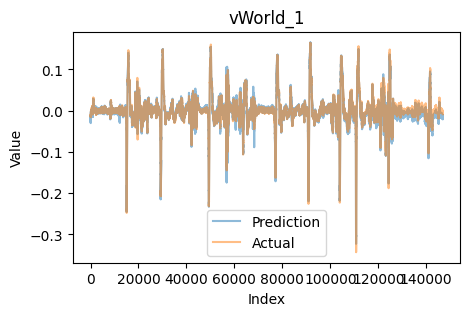

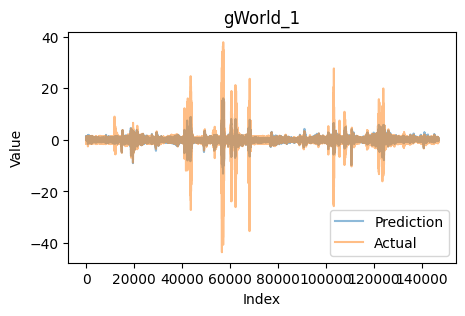

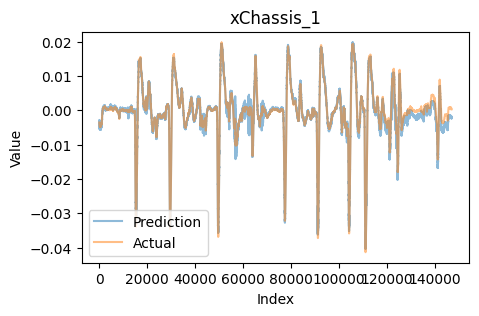

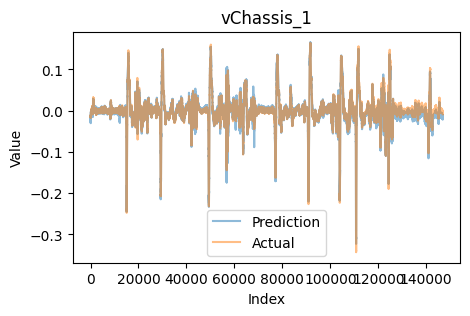

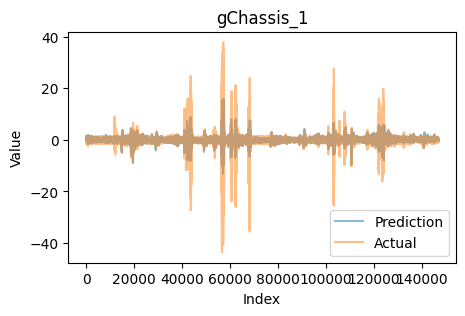

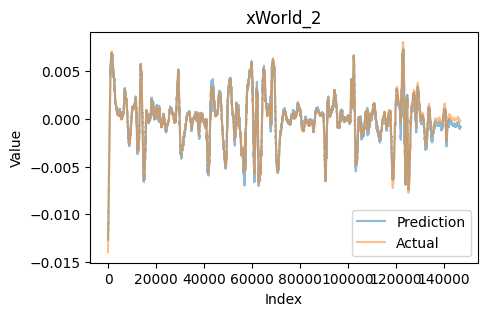

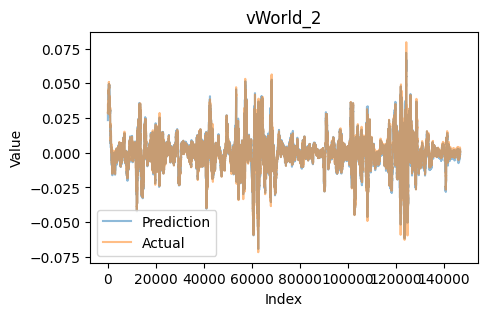

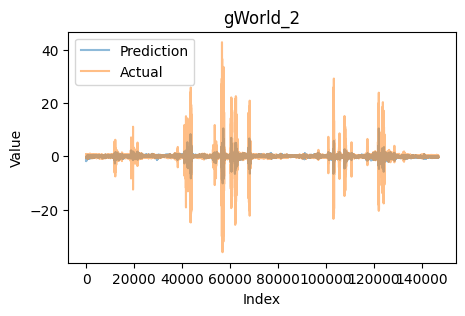

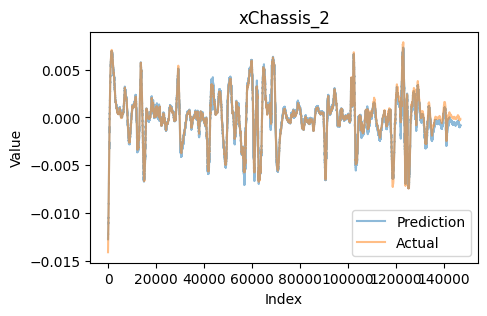

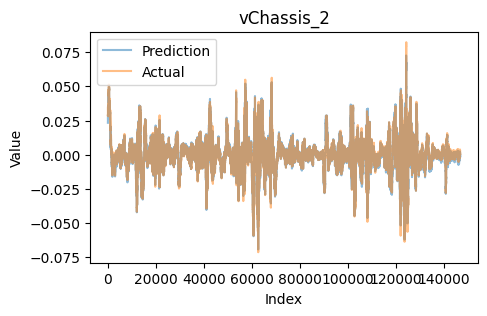

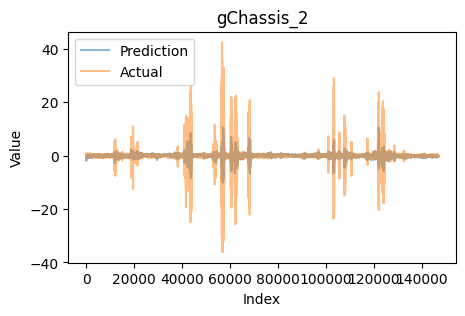

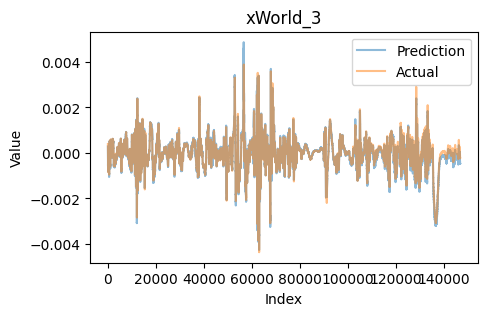

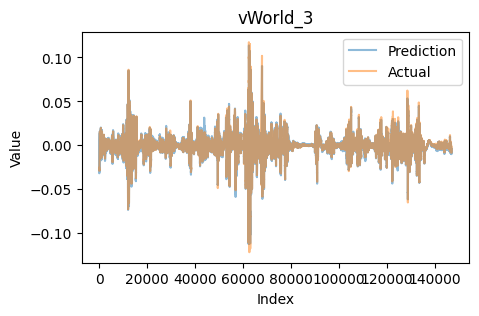

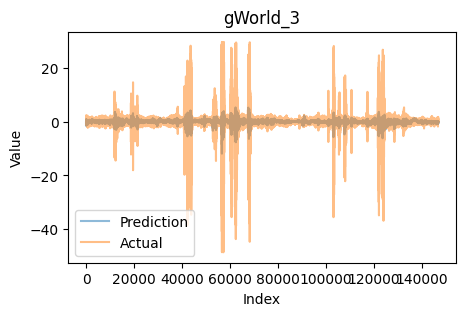

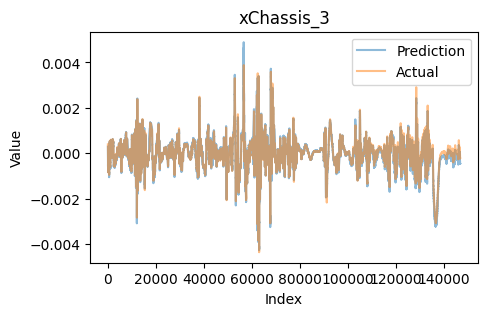

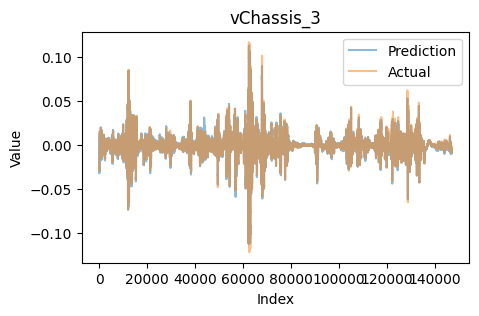

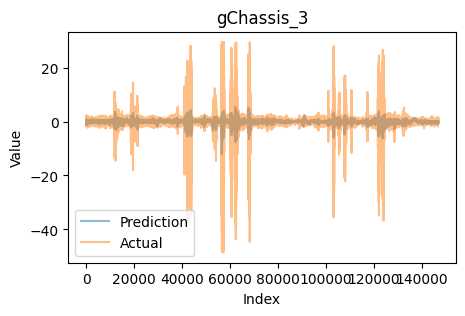

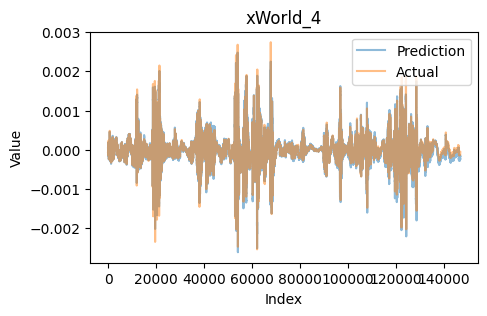

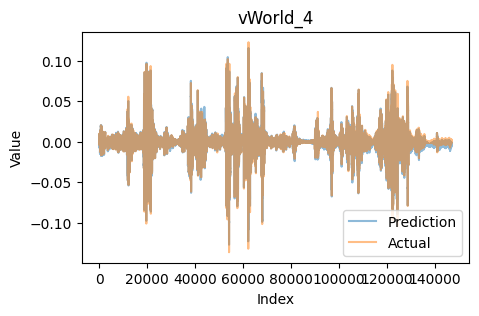

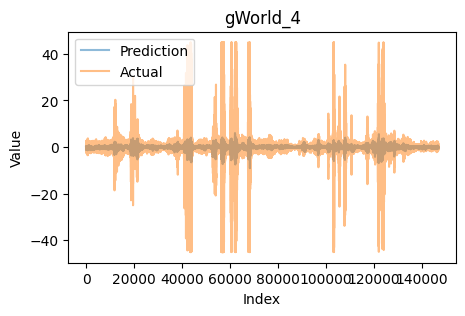

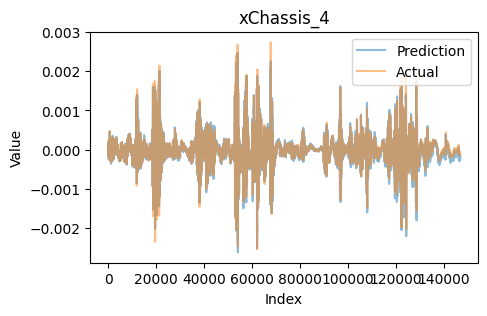

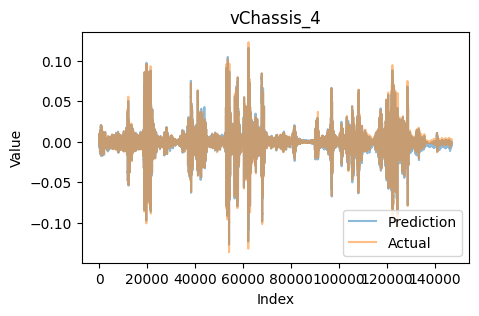

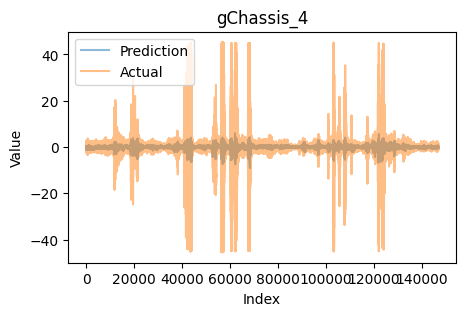

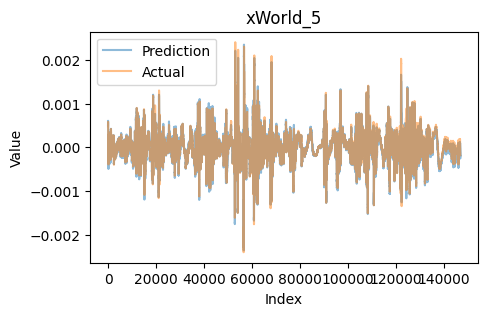

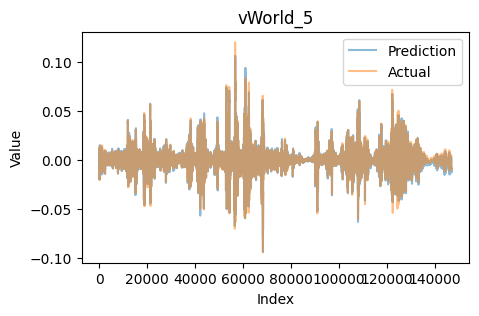

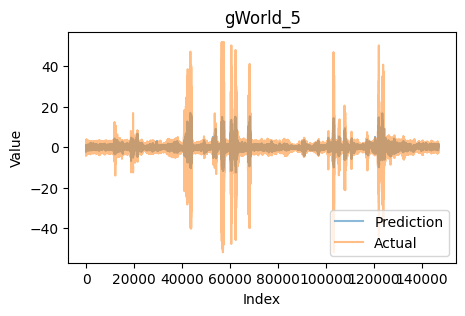

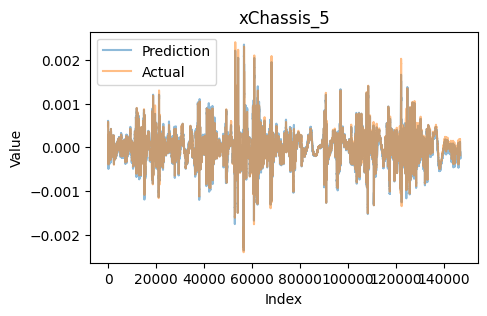

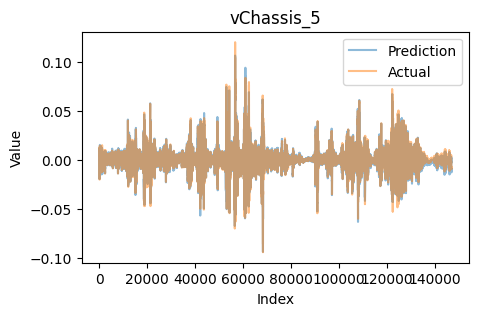

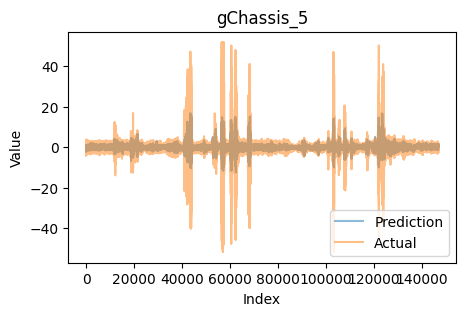

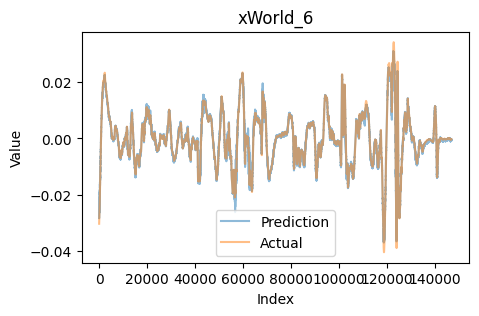

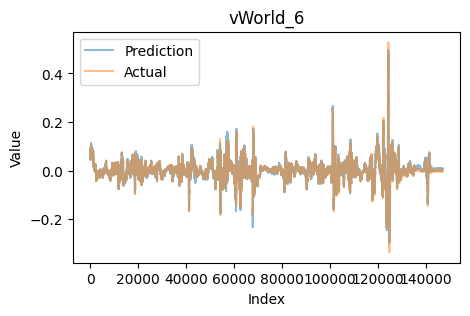

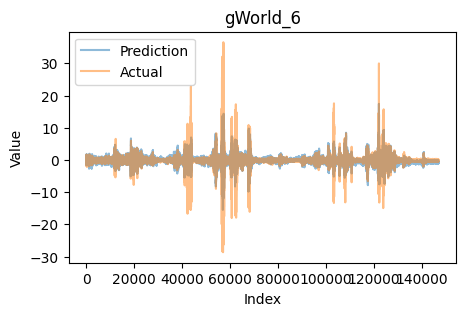

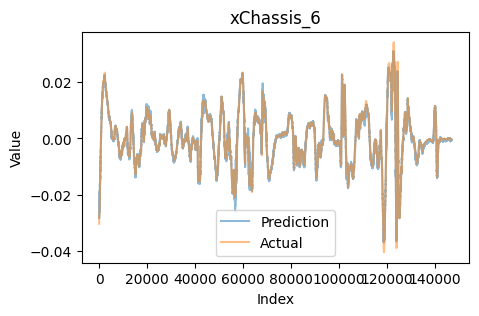

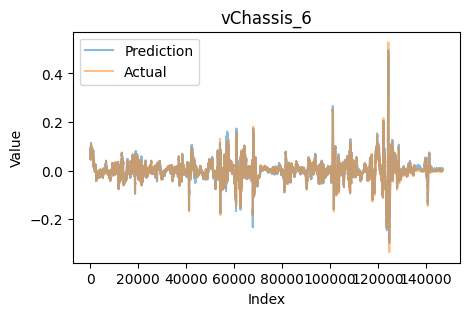

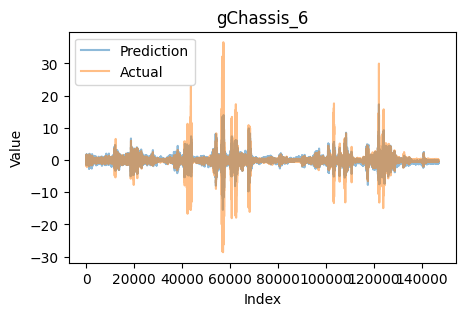

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'next_step' contains your predicted values and 'states' contains your actual values
number_of_variables = 36  # Adjust this based on your actual number of variables
for x in range(number_of_variables):
    #print(next_step)
    variables_x = []
    for i in next_step_tf:
        for j in i:
            variables_x.append(j[x])

    # Plot the extracted variables
    plt.figure(figsize=(5, 3))
    first_variables = states_xWorld.iloc[:, x]
    plt.plot(variables_x, label='Prediction',alpha=0.5)
    plt.plot(first_variables, label='Actual',alpha=0.5)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'{states_xWorldNoForce.columns[x]}')
    plt.legend()
    plt.show()


In [ ]:
states_xWorldNoForce.columns[0]

'xWorld_1'